# Call the Packages

In [1]:
import pandas as pd
pd.options.display.max_rows = 999

import numpy as np
import seaborn as sns
import category_encoders as ce
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from matplotlib import pyplot

import calendar
import warnings     ##imports warning ignore for superficial warnings
warnings.filterwarnings('ignore')

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Read in the data

In [2]:
wp = pd.read_csv('TrainingSetValues.csv') #read in the main data set
ps = pd.read_csv('TrainingSetLabels.csv') #reads in the secondary dataset

In [3]:
wps = pd.merge(wp, ps) ## merge training set values as one data set
wps.info() ## display the full data set

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [4]:
wps.to_csv('wps.csv', index=True)##captures CSV with the changes up to this point
wps.shape

(59400, 41)

# Removing Nulls

In [5]:
wps = wps.fillna(wps['funder'].value_counts().index[0])##removing nulls from values. Somehow removed all nulls
wps.isnull().sum()## count's nulls and dislplays counts for each column

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
s

# Changing objects with catagorical information into catagorical data type

In [6]:
wps['water_quality']=pd.Categorical(wps['water_quality']) ##changing Payment to catagorical data
wps['quality_group']=pd.Categorical(wps['quality_group'])##changing Payment to catagorical data
wps['quantity']=pd.Categorical(wps['quantity']) ##changing Payment to catagorical data
wps['quantity_group']=pd.Categorical(wps['quantity_group'])##changing Payment to catagorical data
wps['source']=pd.Categorical(wps['source']) ##changing Payment to catagorical data
wps['source_type']=pd.Categorical(wps['source_type'])##changing Payment to catagorical data
wps['source_class']=pd.Categorical(wps['source_class']) ##changing Payment to catagorical data
wps['status_group']=pd.Categorical(wps['status_group'])##changing Payment to catagorical data
wps['waterpoint_type']=pd.Categorical(wps['waterpoint_type']) ##changing Payment to catagorical data
wps['waterpoint_type_group']=pd.Categorical(wps['waterpoint_type_group']) ##changing Payment to catagorical data
wps['permit']=wps['permit'].astype('bool') ##changing Payment to catagorical data
wps['extraction_type']=pd.Categorical(wps['extraction_type'])##changing Payment to catagorical data
wps['extraction_type_group']=pd.Categorical(wps['extraction_type_group']) ##changing Payment to catagorical data
wps['extraction_type_class']=pd.Categorical(wps['extraction_type_class'])##changing Payment to catagorical data
wps['management']=pd.Categorical(wps['management']) ##changing Payment to catagorical data
wps['management_group']=pd.Categorical(wps['management_group'])##changing Payment to catagorical data
wps['payment_type']=pd.Categorical(wps['payment_type']) ##changing Payment to catagorical data
wps['extraction_type_class']=pd.Categorical(wps['extraction_type_class'])##changing Payment to catagorical data
wps['payment']=pd.Categorical(wps['payment']) ##changing Payment to catagorical data


wps['construction_year'] = wps['construction_year'].replace(0, 1959) ## unsure of the correlation of a 0 year to the rest of the data but will relplace the zero with 1959


# encoding catagorical Data types

In [7]:
wps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id                     59400 non-null  int64   
 1   amount_tsh             59400 non-null  float64 
 2   date_recorded          59400 non-null  object  
 3   funder                 59400 non-null  object  
 4   gps_height             59400 non-null  int64   
 5   installer              59400 non-null  object  
 6   longitude              59400 non-null  float64 
 7   latitude               59400 non-null  float64 
 8   wpt_name               59400 non-null  object  
 9   num_private            59400 non-null  int64   
 10  basin                  59400 non-null  object  
 11  subvillage             59400 non-null  object  
 12  region                 59400 non-null  object  
 13  region_code            59400 non-null  int64   
 14  district_code          59400 non-null 

In [8]:
wps_onehot = pd.get_dummies(wps, columns=['water_quality','quality_group','quantity','quantity_group','source','source_type','source_class', 'status_group', 'waterpoint_type', 'waterpoint_type_group', 'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment_type', 'payment'])

In [9]:
wps_onehot.to_csv('wps_onehot.csv', index=True)
wps_onehot.shape

(59400, 154)

In [10]:
print(wps_onehot.dtypes)

id                                               int64
amount_tsh                                     float64
date_recorded                                   object
funder                                          object
gps_height                                       int64
installer                                       object
longitude                                      float64
latitude                                       float64
wpt_name                                        object
num_private                                      int64
basin                                           object
subvillage                                      object
region                                          object
region_code                                      int64
district_code                                    int64
lga                                             object
ward                                            object
population                                       int64
public_mee

In [22]:
print(wps_onehot.head())

      id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572      6000.0     3/14/2011         Roman        1390         Roman   
1   8776         0.0      3/6/2013       Grumeti        1399       GRUMETI   
2  34310        25.0     2/25/2013  Lottery Club         686  World vision   
3  67743         0.0     1/28/2013        Unicef         263        UNICEF   
4  19728         0.0     7/13/2011   Action In A           0       Artisan   

   longitude   latitude              wpt_name  num_private  ...  \
0  34.938093  -9.856322                  none            0  ...   
1  34.698766  -2.147466              Zahanati            0  ...   
2  37.460664  -3.821329           Kwa Mahundi            0  ...   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0  ...   
4  31.130847  -1.825359               Shuleni            0  ...   

  payment_type_other payment_type_per bucket payment_type_unknown  \
0                  0                       0               

# Selecting Heatmap

Text(0, 12.3, 'Unsupervised Data Correlation')

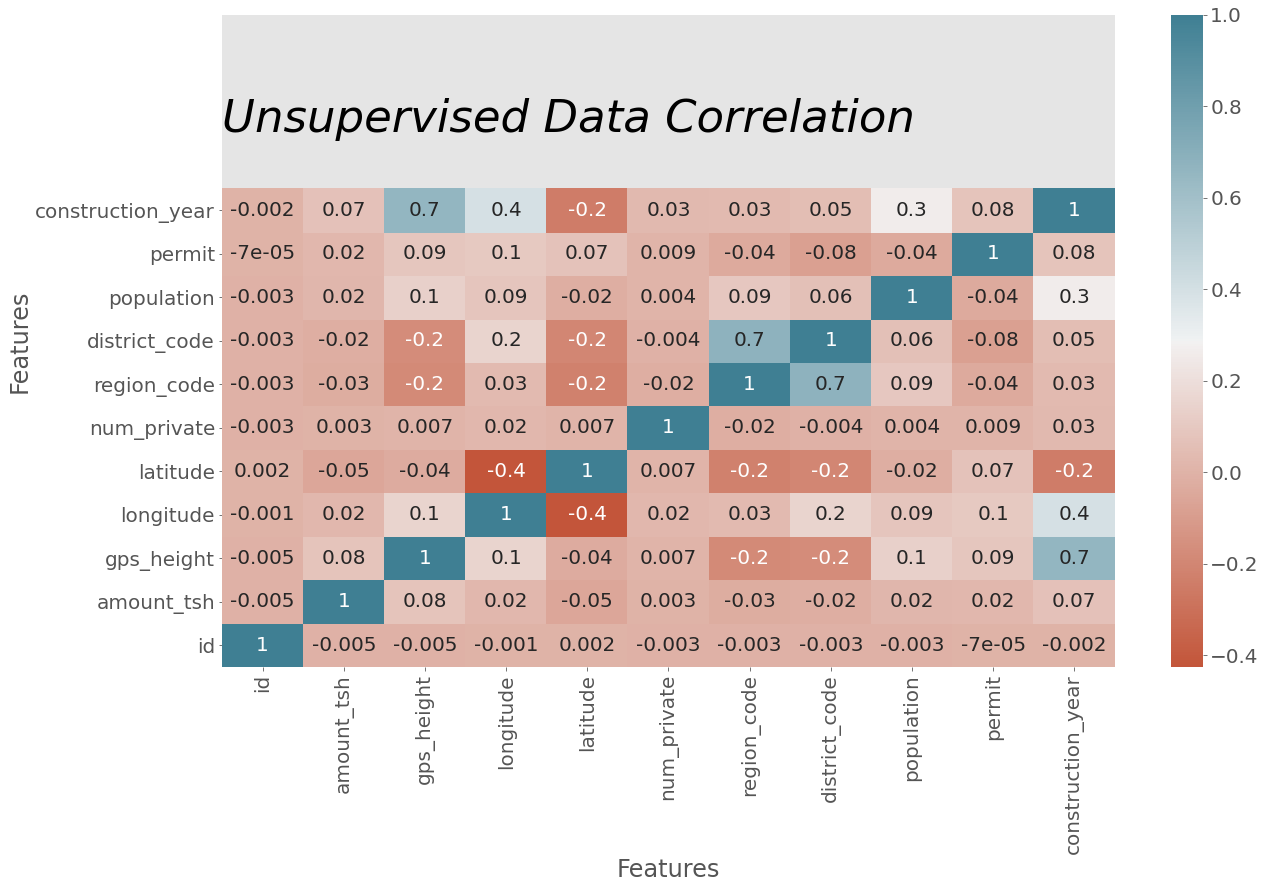

In [11]:
plt.rcParams['font.size'] = 20
bg_color = (0.88,0.85,0.95)

corr = wps.corr() ## Correlation matrix designation
f, ax = plt.subplots(figsize=(20,12)) ## adjust size of the matrix
cmap = sns.diverging_palette(20,220, n=256, as_cmap=True) ## make the colors of matrix stnd out
p = sns.heatmap(corr, annot=True, cmap=cmap, fmt= '.1g', robust=False) ## annot provides annotations within the heatmap boxes

plt.xlabel('Features')
plt.ylabel('Features')

ax.set_ylim((0,15))
plt.text(0,12.3, "Unsupervised Data Correlation", fontsize = 45, color='Black', fontstyle='italic')


In [12]:
p.get_figure().savefig('C:\\Users\\845515\\OneDrive - BOOZ ALLEN HAMILTON\\Work\\Challenges\\Unsupervised Data Correlation2')

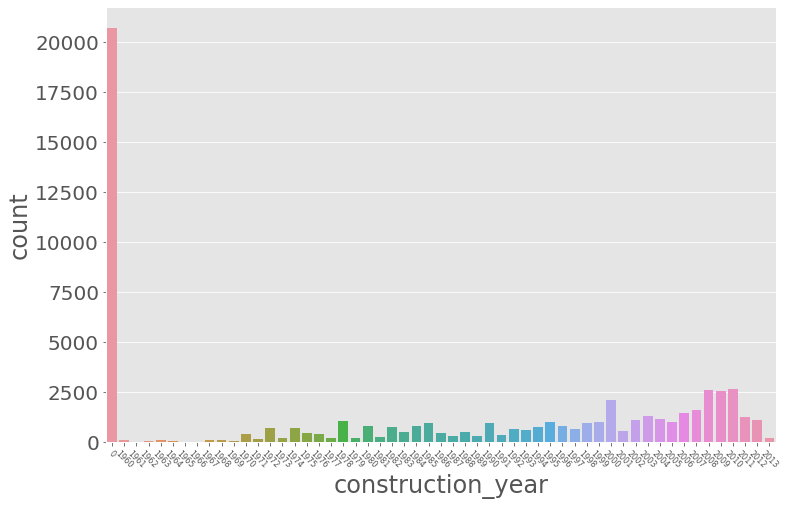

In [13]:
sns.countplot(data = wps, x = 'construction_year',label="Count")
plt.xticks(rotation=-45, size = 8)
plt.show()

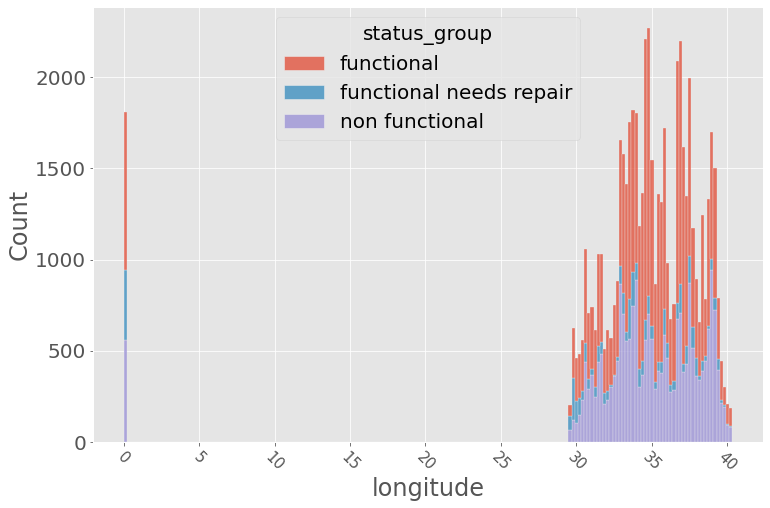

In [28]:
sns.histplot(data=wps, x= 'longitude', hue = 'status_group', multiple='stack')
plt.xticks(rotation=-45, size = 15)
plt.show()

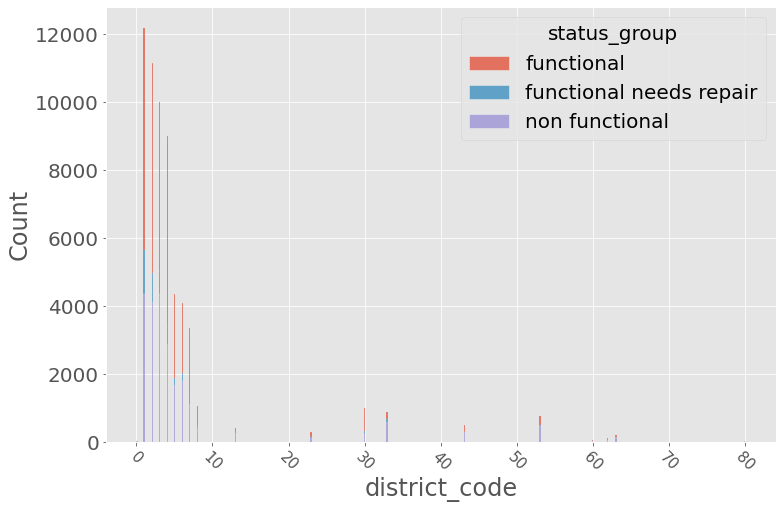

In [26]:
sns.histplot(data=wps, x='district_code', hue = 'status_group', multiple='stack')
plt.xticks(rotation=-45, size = 15)
plt.show()

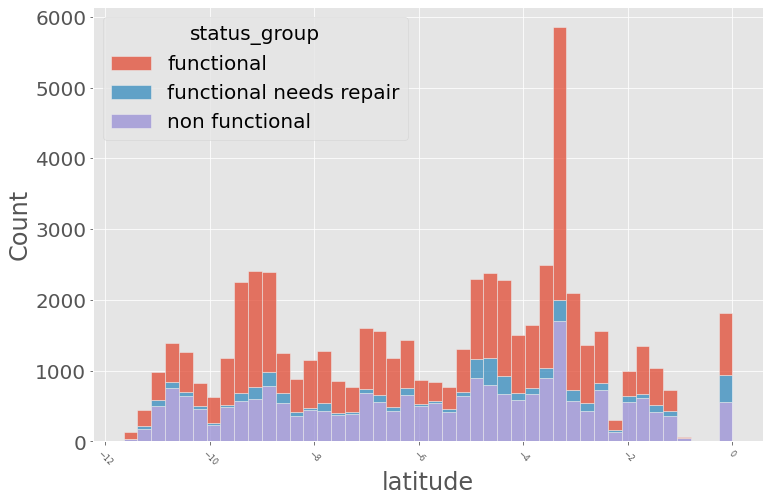

In [16]:
sns.histplot(data=wps, x='latitude', hue = 'status_group', multiple='stack')
plt.xticks(rotation=-45, size = 8)
plt.show()

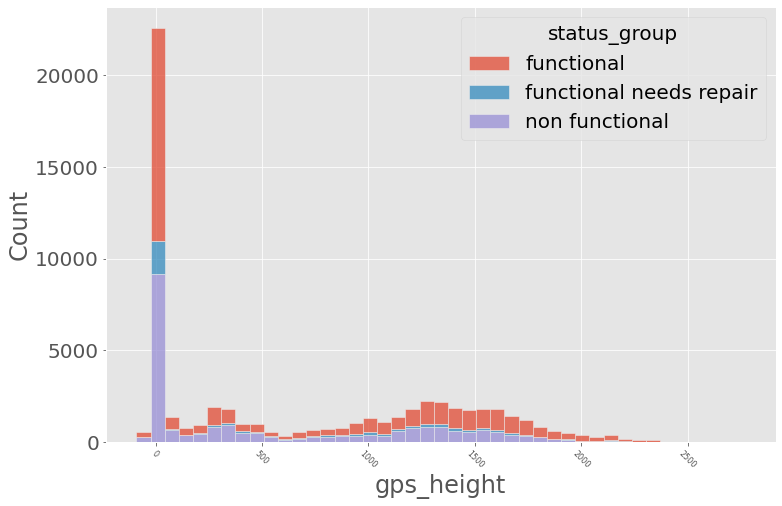

In [17]:
sns.histplot(data=wps, x='gps_height', hue = 'status_group', multiple='stack')
plt.xticks(rotation=-45, size = 8)
plt.show()

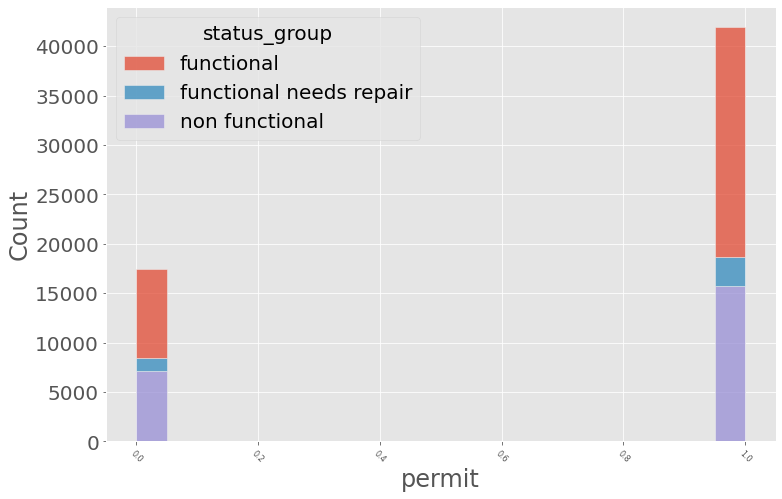

In [18]:
sns.histplot(data=wps, x='permit', hue = 'status_group', multiple='stack')
plt.xticks(rotation=-45, size = 8)
plt.show()

In [19]:
X = wps.iloc[:,:-1].values
y= wps.iloc[:,4].values

## from the correlation heatmap two data correlations stand out
1. gps_height to construction_year
2. district_code to region_code
3. construction_year to longitude
4. longitude to gps_height
5. longitude to district_code
6. populaation to constuction_year

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.40)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

ValueError: could not convert string to float: '3/12/2011'

In [24]:
wps_num = wps.select_dtypes(np.number) ##splitting data types to reformat types
wps_cat = wps.select_dtypes(np.object)